In [192]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [193]:
Data = pd.read_csv('customer_purchase_data.csv')
df = Data.copy()

In [194]:
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

In [198]:
df['Gender'] = df['Gender'].fillna('Male')
# df['Add-ons Purchased'] = df['Add-ons Purchased'].fillna('None')

In [196]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
lowest_date = df['Purchase Date'].min()
highest_date = df['Purchase Date'].max()

print(f"Lowest Date: {lowest_date}")
print(f"Highest Date: {highest_date}")

Lowest Date: 2023-09-24 00:00:00
Highest Date: 2024-09-23 00:00:00


In [197]:
# df['Purchase Date'] = df['Purchase Date'].str.replace('-', '').astype(int)
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Purchase Date Unix'] = df['Purchase Date'].astype('int64') // 10**9
df.drop(['Purchase Date', 'Add-ons Purchased'], axis=1, inplace=True)

In [199]:
df.describe()

,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total,Purchase Date Unix
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04
mean,10483.526550,48.994100,3.093950,3180.133419,578.631867,5.485550,62.244848,1.713437e+09
std,5631.732525,18.038745,1.223764,2544.978675,312.274076,2.870854,58.058431,8.291145e+06
min,1000.000000,18.000000,1.000000,20.750000,20.750000,1.000000,0.000000,1.695514e+09
25%,5478.000000,33.000000,2.000000,1139.680000,361.180000,3.000000,7.615000,1.707091e+09
50%,10499.500000,49.000000,3.000000,2534.490000,463.960000,5.000000,51.700000,1.713917e+09
75%,15504.000000,65.000000,4.000000,4639.600000,791.190000,8.000000,93.842500,1.720397e+09
max,19998.000000,80.000000,5.000000,11396.800000,1139.680000,10.000000,292.770000,1.727050e+09


In [200]:
df_num = df.select_dtypes(exclude=['object'])
df_cat = df.select_dtypes(include=['object'])

In [201]:
df_cat.nunique()

Gender             2
Loyalty Member     2
Product Type       5
SKU               10
Order Status       2
Payment Method     6
Shipping Type      5
dtype: int64

In [202]:
numerical_features = list(df_num.columns)
categorical_features = list(df_cat.columns)

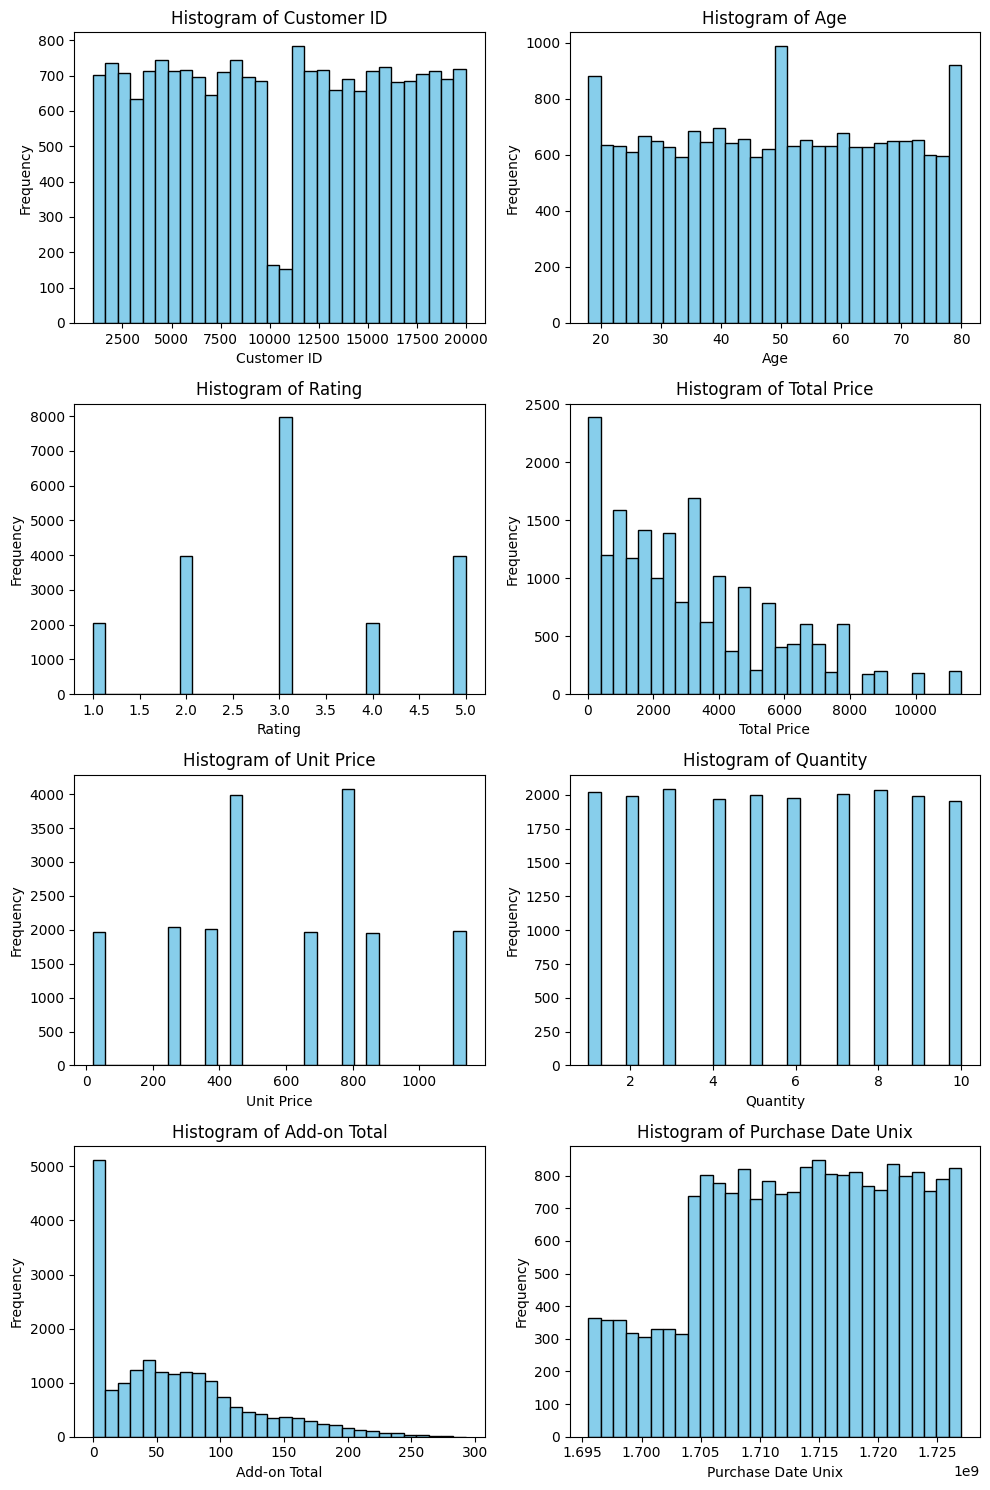

In [203]:
plt.figure(figsize=(10, 15))

for i, column in enumerate(numerical_features, 1):
    plt.subplot(4, 2, i)
    plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

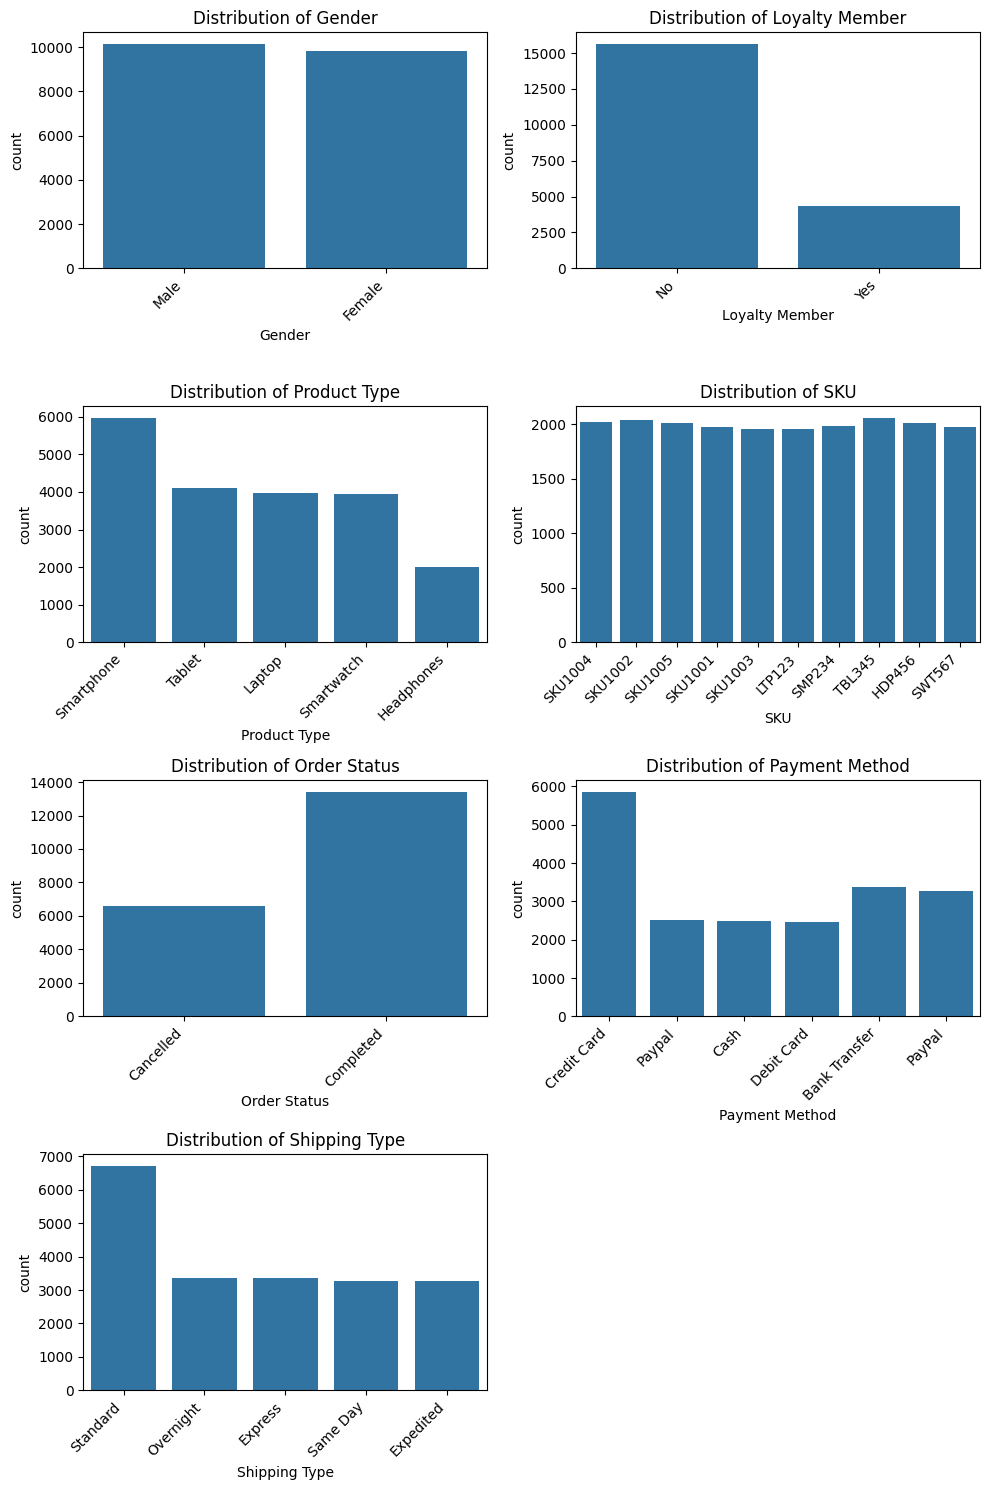

In [204]:
plt.figure(figsize=(10, 15))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(4, 2, i)
    sns.countplot(df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

<Axes: >

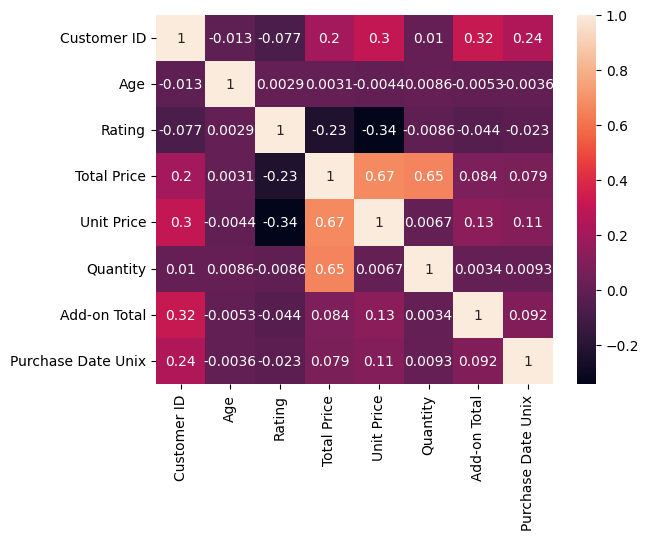

In [205]:
sns.heatmap(df_num.corr(), annot=True)

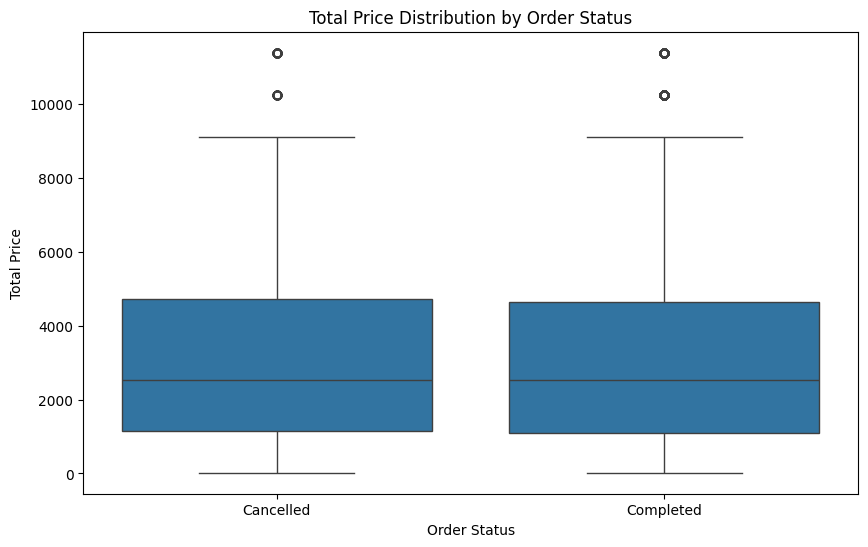

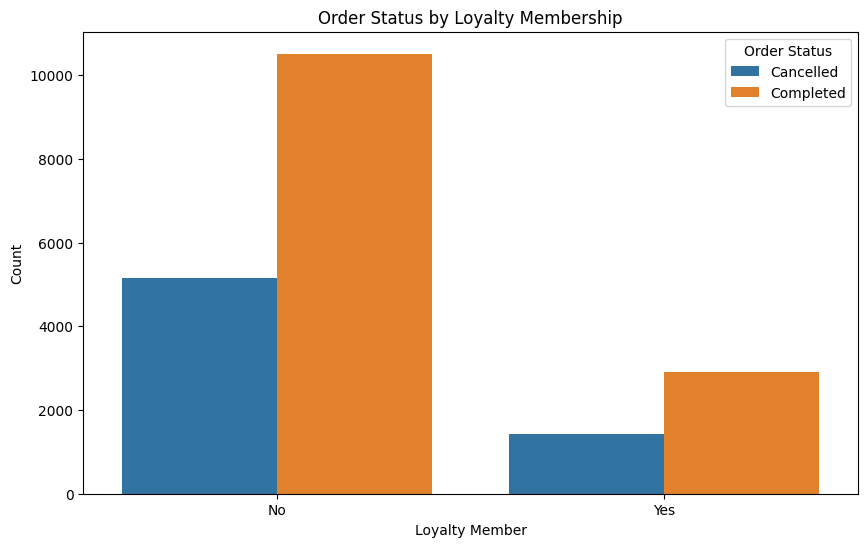

In [206]:
# 1. Order Status and Total Price
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Order Status', y='Total Price')
plt.title('Total Price Distribution by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Total Price')
plt.show()

# 2. Loyalty Members and Order Status
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Loyalty Member', hue='Order Status')
plt.title('Order Status by Loyalty Membership')
plt.xlabel('Loyalty Member')
plt.ylabel('Count')
plt.legend(title='Order Status', loc='upper right')
plt.show()

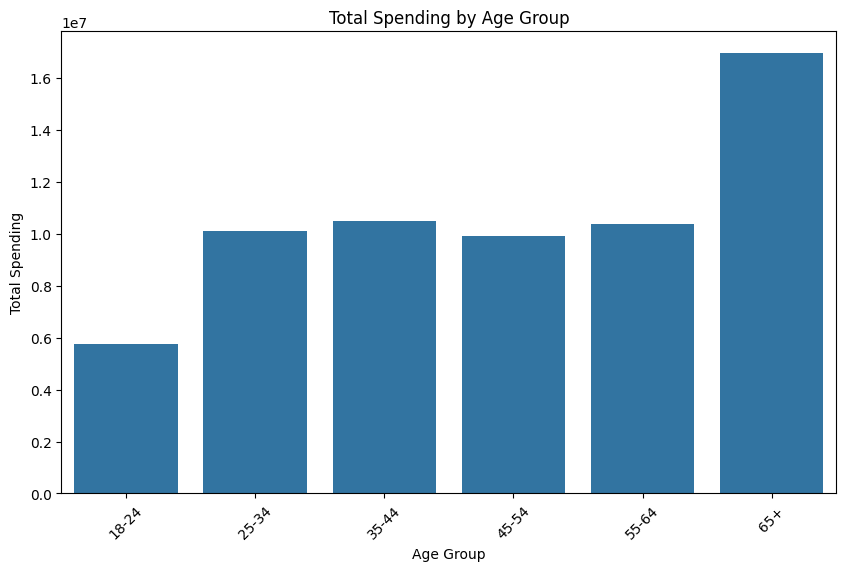

In [210]:
# 1. Age Groups Segmentation
# Define age bins
age_bins = [18, 24, 34, 44, 54, 64, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate total spending per age group
age_group_spending = df.groupby('Age Group', observed=True)['Total Price'].sum().sort_values(ascending=False)

# Plot total spending per age group
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_spending.index, y=age_group_spending.values)
plt.title('Total Spending by Age Group')
plt.ylabel('Total Spending')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.show()


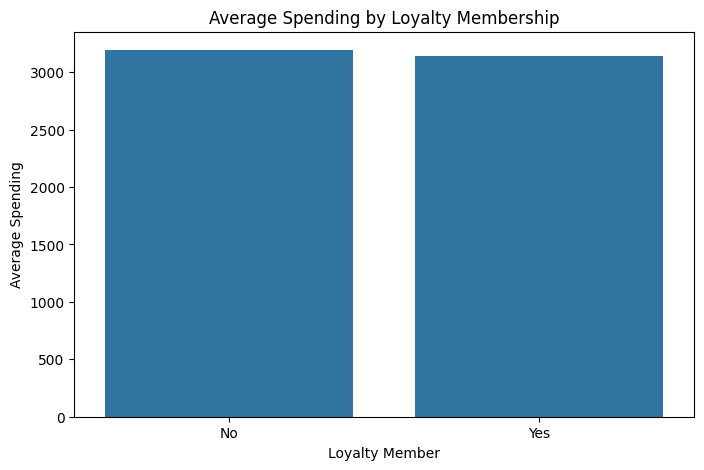

In [211]:
# 2. Loyalty Membership Analysis
# Compare average spending between loyalty members and non-members
loyalty_spending = df.groupby('Loyalty Member')['Total Price'].mean()

# Plot average spending by loyalty status
plt.figure(figsize=(8, 5))
sns.barplot(x=loyalty_spending.index, y=loyalty_spending.values)
plt.title('Average Spending by Loyalty Membership')
plt.ylabel('Average Spending')
plt.xlabel('Loyalty Member')
plt.show()

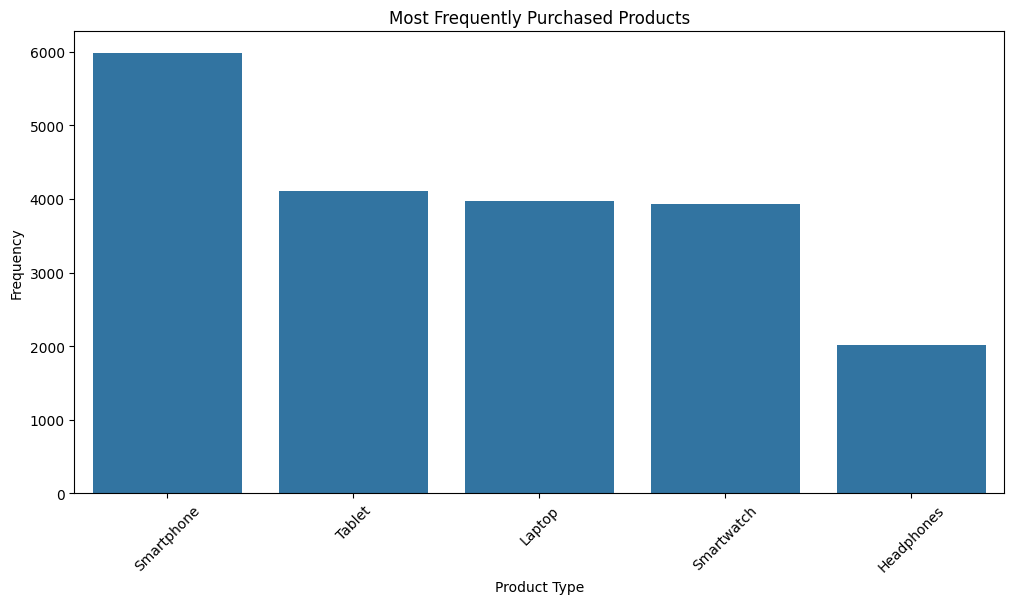

In [213]:
# 3. Product Preferences Analysis
# Most frequently purchased products
product_preferences = df['Product Type'].value_counts()

# Plot product preferences
plt.figure(figsize=(12, 6))
sns.barplot(x=product_preferences.index, y=product_preferences.values)
plt.title('Most Frequently Purchased Products')
plt.ylabel('Frequency')
plt.xlabel('Product Type')
plt.xticks(rotation=45)
plt.show()